In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import ClusterCentroids
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Final Data');
#Normalize data
scaledData = preprocessing.MinMaxScaler().fit_transform(df.values);
df = pd.DataFrame(scaledData, index = df.index, columns = df.columns);
print(df.describe());

              PRCP  Delta T Min  Delta T Max         TMAX  \
count  2910.000000  2910.000000  2910.000000  2910.000000   
mean      0.019899     0.217197     0.448535     0.502817   
std       0.056304     0.219058     0.292105     0.352508   
min       0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.021786     0.165847     0.134172   
50%       0.000000     0.164758     0.496130     0.495807   
75%       0.007500     0.370706     0.684559     0.865828   
max       1.000000     1.000000     1.000000     1.000000   

       5 second wind speed squared  2 min wind speed squared  \
count                  2910.000000               2910.000000   
mean                      0.031864                  0.057726   
std                       0.071300                  0.059636   
min                       0.000000                  0.000000   
25%                       0.010548                  0.028859   
50%                       0.016690                  0.041951   
75

In [3]:
df = df[['Power Outage','2 min wind speed squared','Avg Wind Speed Squared','5 second wind speed squared','Fog/Ice' ,'Heavy/Freezing Fog']];

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df['Power Outage'], test_size=0.33, random_state = 1234);

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=12345);
rf.fit(X_train, y_train);

In [6]:
from sklearn.metrics import accuracy_score

pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, pred);

print(f'Score estimate:{rf.oob_score_:.3}');
print("Accuracy: ", accuracy);
print(rf.feature_importances_)

Score estimate:0.934
Accuracy:  0.935483870968
[ 0.23199704  0.43358464  0.2822695   0.03134259  0.02080622]


Accuracy:  0.935483870968


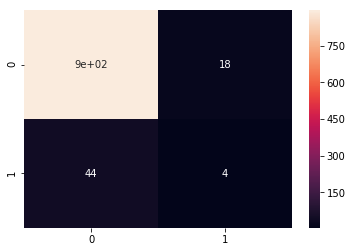

In [7]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, pred));

sns.heatmap(cm, annot=True);
print("Accuracy: ", accuracy);
plt.show();